# <center> CLUSTERING WITH K-MEANS DATA TRAIN
    Nama: Chlaudiah Julinar
    NIM : 1301150434
    Kelas : IF 39 10
</center>

## A. Library
Berikut adalah penjelasan mengenai library yang digunakan:
1. Numpy merupakan package yang paling dasar yang dibutuhkan untuk scientific computing, seperti digunakan untuk mendukung multidimensi array, berbagai jenis object seperti array, dll.
2. Pandas merupakan Python Data Analysis Toolkit. Dapat digunakan untuk melakukan read pada jenis tipe data apapun
3. Plotly digunakan untuk melakukan visualisasi data. Apabila pada python atau anaconda yang digunakan belum memiliki package plotly maka harus dilakukan install melalui pip terlebih dahulu

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## B. Load Data Train
Melakukan loading data pada file Train Set.csv dengan menggunakan package pandas. Tidak perlu menggunakan tab separated seperti delimiter karena pada file dengan tipe csv sudah secara otomatis mengabaikan tab.
Setelah Train Set.csv sudah diload maka dapat dilihat bahwa terdapat 2 kolom yang artinya memiliki 2 data yaitu Value1, Value2. Dengan ukuran matriks yaitu 688 x 2.

In [2]:
file = pd.read_csv('Train Set.csv')
file

,Value1,Value2
0,21.30,20.80
1,20.15,20.90
2,19.20,21.35
3,19.10,21.85
4,18.45,22.80
5,19.40,23.00
6,19.55,22.25
7,19.80,21.85
8,20.50,21.85
9,21.70,21.90


## C. Visualisasi Data
Karena terdapat 2 kolom, maka data dari kedua kolom di pisahkan terlebih dahulu dan ditampung ke dalam dua variabel yang berbeda. Kedua variablel tersebut, akan di plot kedalam sebuah scatter dengan semua warna data berwarna hitam yang artinya data tersebut masih merupakan seluruh data dibagian yang sama.

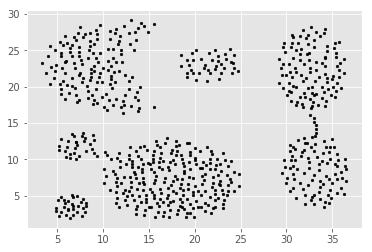

In [3]:
value1 = file['Value1'].values
value2 = file['Value2'].values
data = np.array(list(zip(value1, value2)))
plt.scatter(value1, value2, c='black', s=7)

## D. Clustering Data Train

### D.1 Fungsi Euclidean Distance
1. Buat Fungsi Euclidean Distance untuk menghitung jarak dari data ke centroid dan juga berguna untuk menghitung jarak antara centroid

In [4]:
def euclide(x1,x2,ax=1):
    return np.linalg.norm(x1-x2,axis=ax)

### D.2 Initial Centroid
2. Tentukan terlebih dahulu nilai k sebagai banyaknya cluster yang akan dihitung nilai SSE dari cluster tersebut
3. Tentukan nilai random untuk nilai centroid pada sumbu x dan sumbu y. 
4. Titik centroid_x dan centroid_y digabungkan menjadi satu array sehingga diperoleh nilai centroid yang merupakan **initial centroid**

In [5]:
k = 4
centroid_x = np.random.randint(0, np.max(data)-5, size=k)
centroid_y = np.random.randint(0, np.max(data)-5, size=k)
centroid = np.array(list(zip(centroid_x, centroid_y)),dtype=np.float32)

### D.3 Update Centroid
1. Buat variabel untuk menampung centroid lama, yaitu centroid yang belum di update. Centroid lama tersebut akan digunakan untuk menghitung jarak antara centroid lama dengan centroid baru(yang sudah diupdate)
2. Buat variabel untuk menampung jenis cluster dari tiap data, sehingga data dengan indeks ke i setelah proses perhitungan jarak akan memiliki nilai clusternya
3. Buat variabel untuk menampung jarak antara centroid lama dengan centroid baru(yang sudah diupdate)
4. Lakukan perulangan selama jarak antara centroid lama dengan centroid baru(yang sudah diupdate) sudah bernilai 0. Artinya letak centroid lama dan centroid baru sudah tidak berpindah pindah lagi.
5. Selama perulangan tersebut, lakukan:
5.1 Hitung jarak antara seluruh data dengan titik titik centroid, setelah itu cari data mana yang jaraknya paling kecil dengan suatu centroid, maka data tersebut masuk kedalam kelompok cluster centroid tersebut. Hal ini dilakukan selama masih dalam range dari panjang data train.
5.2 Centroid yang sudah dihitung jaraknya terhadap data, jadikan sebagai **centroid lama**.
5.3 Selama panjang cluster, cocokkan nilai cluster antara tiap data dan masukkan kedalam suatu variable baru yang menampung data data di cluster yang sama. Setelah itu, akan dihitung **rata-rata** dari tiap data di cluster yang sama. **Rata-rata** tersebut akan menjadi nilai **centroid baru** 
6. Tampilkan nilai centroid baru yang sudah tidak berpindah pindah lagi

In [6]:
centroid_old = np.zeros(centroid.shape)
cluster = np.zeros(len(data))
error = euclide(centroid,centroid_old,None)
while error.all() != 0:
    for i in range(len(data)):
        distances = euclide(data[i], centroid)
        c = np.argmin(distances)
        cluster[i] = c
    centroid_old = deepcopy(centroid)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if cluster[j] == i]
        centroid[i] = np.mean(points, axis=0)
    error = euclide(centroid, centroid_old)
print("Centroid: ", centroid)

Centroid:  [[27.889795  23.852041 ]
 [15.758421   6.9766665]
 [33.202084  12.5690975]
 [ 9.040062  21.859627 ]]


### D.4 Pengelompokan Data Pada Tiap Cluster
1. Buat variable penampung yang akan menampung data pada tiap cluster yang berbeda. Variable tersebut sejumlah dengan jumlah cluster yang digunakan
2. Lakukan pengelompokan selama panjang data:
2.1 Jika nilai cluster pada data yang sudah dihitung di bagian **D.3 Update Centroid** bernilai 0.0 maka masukkan indeks dari data tersebut ke cluster0.
2.2 Jika nilai cluster pada data bernilai 1.0 maka masukkan indeks dari data tersebut ke cluster1, dst.
3. Tampilkan indeks dari tiap data yang ada pada suatu cluster dengan banyaknya data pada cluster tersebut.

In [7]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
for i in range(len(data)):
    if cluster[i]==0.0:
        cluster0.append(i)
    elif cluster[i]==1.0:
        cluster1.append(i)
    elif cluster[i]==2.0:
        cluster2.append(i)
    elif cluster[i]==3.0:
        cluster3.append(i)
    elif cluster[i]==4.0:
        cluster4.append(i)
    elif cluster[i]==5.0:
        cluster5.append(i)
    elif cluster[i]==6.0:
        cluster6.append(i)
    elif cluster[i]==7.0:
        cluster7.append(i)
    elif cluster[i]==8.0:
        cluster8.append(i)
print("Cluster 0: ",cluster0, "Jumlah data: ",len(cluster0))
print()
print("Cluster 1: ",cluster1, "Jumlah data: ",len(cluster1))
print()
print("Cluster 2: ",cluster2, "Jumlah data: ",len(cluster2))
print()
print("Cluster 3: ",cluster3, "Jumlah data: ",len(cluster3))
print()
print("Cluster 4: ",cluster4, "Jumlah data: ",len(cluster4))
print()
print("Cluster 5: ",cluster5, "Jumlah data: ",len(cluster5))
print()
print("Cluster 6: ",cluster6, "Jumlah data: ",len(cluster6))
print()
print("Cluster 7: ",cluster7, "Jumlah data: ",len(cluster7))
print()
print("Cluster 8: ",cluster8, "Jumlah data: ",len(cluster8))

Cluster 0:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 561, 562, 563, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658] Jumlah data:  98

Cluster 1:  [277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 

## E. Perhitungan Quality of Cluster menggunakan SSE
Kualitas bagus atau tidaknya cluster yang kita pilih dengan nilai centroid yang diperoleh, dapat diukur menggunakan perhitungan Sum of Square Error (SSE). Berikut adalah rumusnya: 
![](files/SSE.png)
Cara penggunaan rumus ini adalah:
1. Lakukan perulangan selama panjang dari cluster
2. Selama perulangan, lakukan: Hitung jarak dari tiap data dengan centroid selama panjang data dari tiap cluster, dengan aturan tiap data berada pada cluster yang sama
3. Setelah memperoleh total jarak antara data dengan centroid dari tiap cluster, maka jumlahkan seluruh data tersebut sehingga diperoleh nilai **SSE** yang diinginkan.

In [8]:
total0 = 0
total1 = 0
total2 = 0
total3 = 0
total4 = 0
total5 = 0
total6 = 0
total7 = 0
total8 = 0
for i in range(k):
    total0 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster0)) if cluster[j] == i])
    total1 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster1)) if cluster[j] == i])
    total2 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster2)) if cluster[j] == i])
    total3 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster3)) if cluster[j] == i])
    total4 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster4)) if cluster[j] == i])
    total5 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster5)) if cluster[j] == i])
    total6 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster6)) if cluster[j] == i])
    total7 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster7)) if cluster[j] == i])
    total8 = np.sum([euclide(data[j],centroid[i], ax=0) for j in range(len(cluster8)) if cluster[j] == i])
print("Total Jarak Cluster 0: ",total0)
print("Total Jarak Cluster 1: ",total1)
print("Total Jarak Cluster 2: ",total2)
print("Total Jarak Cluster 3: ",total3)
print("Total Jarak Cluster 4: ",total4)
print("Total Jarak Cluster 5: ",total5)
print("Total Jarak Cluster 6: ",total6)
print("Total Jarak Cluster 7: ",total7)
print("Total Jarak Cluster 8: ",total8)
print("SSE: ",total0+total1+total2+total3+total4+total5+total6+total7+total8)

Total Jarak Cluster 0:  303.0764217775836
Total Jarak Cluster 1:  608.6028787449584
Total Jarak Cluster 2:  461.1658307631276
Total Jarak Cluster 3:  489.2398913198586
Total Jarak Cluster 4:  0.0
Total Jarak Cluster 5:  0.0
Total Jarak Cluster 6:  0.0
Total Jarak Cluster 7:  0.0
Total Jarak Cluster 8:  0.0
SSE:  1862.0850226055281


## F. Visualisasi Data yang Telah di Clustering

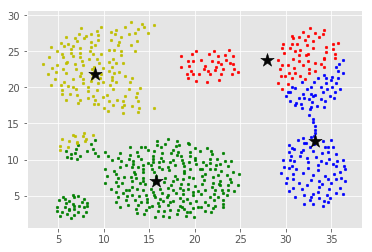

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm','black','grey','orange','purple']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([data[j] for j in range(len(data)) if cluster[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='#050505')

## G. Observasi Data Train

## Elbow Method

Observasi data train yang saya lakukan adalah observasi tiap nilai **SSE** dari suatu nilai cluster yang ditentukan dengan nilai centroid yang sudah fix. Untuk melakukan hal tersebut, saya mencoba untuk melakukan perhitungan nilai **SSE** pada nilai cluster dengan **Range(1,8)** . 
<br>
Pada program ini, hal tersebut dapat dilakukan dengan cara:
1. Mengganti nilai **k** yang ada pada **code** seperti pada point ke **--D.2 Initial Centroid--**.
Setelah mengganti nilai **k** dan memperoleh SSE dan Centroid, maka:
2. Nilai SSE dan nilai centroid dari SSE tersebut disimpan kedalam suatu file excel.
3. Nilai SSE dari tiap cluster dapat divisualisasikan dan dapat dimodelkan menjadi suatu grafik
4. Dari grafik tersebut, dapat ditentukan nilai cluster mana yang dapat diperoleh sesuai dengan **Elbow Method.**
<br>
<br>
Berikut adalah data dari nilai SSE dan Centroid dari tiap cluster yang saya observasi:

In [10]:
raw_data1 = {'k': [1],
            'Centroid x': [19.565262],
            'Centroid y': [14.033721],
            'SSE' :[8322.673788]}
c1 = pd.DataFrame(raw_data1,columns = ['k', 'Centroid x','Centroid y', 'SSE'])
c1

,k,Centroid x,Centroid y,SSE
0,1,19.565262,14.033721,8322.673788


In [11]:
raw_data2 = {'k': [2,''],
            'Centroid x': [31.582619,13.411319],
            'Centroid y': [16.663734,12.686923],
            'SSE' :[4931.087545,'']}
c2 = pd.DataFrame(raw_data2,columns = ['k','Centroid x','Centroid y', 'SSE'])
c2

,k,Centroid x,Centroid y,SSE
0,2,31.582619,16.663734,4931.09
1,,13.411319,12.686923,


In [12]:
raw_data3 = {'k': [3,'',''],
            'Centroid x': [32.30764,15.485204,10.841573],
            'Centroid y': [16.432638, 7.1409864, 22.507303],
            'SSE' :[2662.359933,'','']}
c3 = pd.DataFrame(raw_data3,columns = ['k','Centroid x','Centroid y', 'SSE'])
c3

,k,Centroid x,Centroid y,SSE
0,3,32.307640,16.432638,2662.36
1,,15.485204,7.140986,
2,,10.841573,22.507303,


In [13]:
raw_data4 = {'k': [4,'','',''],
            'Centroid x': [17.767733,
                            12.230082,
                            10.859322,
                            32.30764,],
            'Centroid y': [8.754651,
                            4.9341464,
                            22.559605,
                            16.432638,],
            'SSE' :[901.3766958,'','','']}
c4 = pd.DataFrame(raw_data4,columns = ['k','Centroid x','Centroid y', 'SSE'])
c4

,k,Centroid x,Centroid y,SSE
0,4,17.767733,8.754651,901.377
1,,12.230082,4.934146,
2,,10.859322,22.559605,
3,,32.307640,16.432638,


In [14]:
raw_data5 = {'k': [5,'','','',''],
            'Centroid x': [18.100231,
                            32.73835,
                            13.921818,
                            8.47623,
                            7.9863157,],
            'Centroid y': [7.1824074,
                            16.09733,
                            24.465,
                            5.637705,
                            18.449474,],
            'SSE' :[652.8890597,'','','','']}
c5 = pd.DataFrame(raw_data5,columns = ['k','Centroid x','Centroid y', 'SSE'])
c5

,k,Centroid x,Centroid y,SSE
0,5,18.100231,7.182407,652.889
1,,32.738350,16.097330,
2,,13.921818,24.465000,
3,,8.476230,5.637705,
4,,7.986316,18.449474,


In [15]:
raw_data6 = {'k': [6,'','','','',''],
            'Centroid x': [10.295193,
                            8.575,
                            26.455084,
                            32.77621,
                            12.546482,
                            21.47,],
            'Centroid y': [26.3375,
                                20.648958,
                                7.4409604,
                                21.072178,
                                7.3271356,
                                22.88125,],
            'SSE' :[479.6905512,'','','','','']}
c6 = pd.DataFrame(raw_data6,columns = ['k','Centroid x','Centroid y', 'SSE'])
c6

,k,Centroid x,Centroid y,SSE
0,6,10.295193,26.337500,479.691
1,,8.575000,20.648958,
2,,26.455084,7.440960,
3,,32.776210,21.072178,
4,,12.546482,7.327136,
5,,21.470000,22.881250,


In [16]:
raw_data7 = {'k': [7,'','','','','',''],
            'Centroid x': [11.914286,
                            14.806048,
                            30.825834,
                            32.655857,
                            8.612,
                            19.34091,
                            23.135],
            'Centroid y': [14.994047,
                            6.7435484,
                            8.377084,
                            22.051802,
                            23.3392,
                            23.461363,
                            23.325,],
            'SSE' :[138.1096539,'','','','','','']}
c7 = pd.DataFrame(raw_data7,columns = ['k','Centroid x','Centroid y', 'SSE'])
c7

,k,Centroid x,Centroid y,SSE
0,7,11.914286,14.994047,138.11
1,,14.806048,6.743548,
2,,30.825834,8.377084,
3,,32.655857,22.051802,
4,,8.612000,23.339200,
5,,19.340910,23.461363,
6,,23.135000,23.325000,


In [17]:
raw_data8 = {'k': [8,'','','','','','',''],
            'Centroid x': [16.07037,
                            8.881372,
                            10.109821,
                            18.823404,
                            7.082258,
                            31.615854,
                            33.10798,
                            9.92],
            'Centroid y': [20.82037,
                            4.1284313,
                            26.202679,
                            7.0018616,
                            21.314516,
                            22.306911,
                            8.855319,
                            10.65
                            ],
            'SSE' :[0,'','','','','','','']}
c8 = pd.DataFrame(raw_data8,columns = ['k','Centroid x','Centroid y', 'SSE'])
c8

,k,Centroid x,Centroid y,SSE
0,8,16.070370,20.820370,0
1,,8.881372,4.128431,
2,,10.109821,26.202679,
3,,18.823404,7.001862,
4,,7.082258,21.314516,
5,,31.615854,22.306911,
6,,33.107980,8.855319,
7,,9.920000,10.650000,


Dari nilai **SSE** pada setiap cluster tersebut, maka dapat memperoleh grafik sebagai berikut:
![](files/Elbow Method.png)
<br>
<br>
Sehingga, pada grafik tersebut dapat dilihat bahwa sesuai dengan **Elbow Method** saya memilih **nilai cluster** yaitu **4** dengan **nilai SSE** pada data train yaitu sebesar **901.3766958**.

# <center> PENGUJIAN DATA TEST </center>

Pada data test, akan dilakukan pengujian terhadap nilai cluster yang telah diperoleh pada tahap observasi data train yaitu **Nilai Cluster = 4** dengan **nilai centroid x = [17.767733, 12.230082, 10.859322, 32.30764]** dan **nilai centroid y = [8.754651, 4.9341464, 22.559605, 16.432638]** sehingga kita akan memperoleh tipe cluster dari tiap data dan nilai SSE pada data test tersebut.

## A. Load Data Test

In [18]:
filetest = pd.read_csv('Data Test.csv')
filetest

,Value1,Value2
0,18.75,22.95
1,21.45,21.45
2,20.50,22.85
3,20.65,24.30
4,21.70,23.80
5,23.10,21.70
6,13.35,28.45
7,12.40,27.85
8,12.20,28.65
9,12.90,26.50


## B. Visualisasi Data

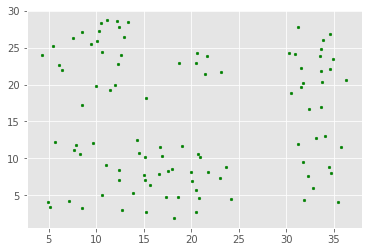

In [19]:
value1 = filetest['Value1'].values
value2 = filetest['Value2'].values
datatest = np.array(list(zip(value1, value2)))
plt.scatter(value1, value2, c='green', s=7)

## C. Clustering Data Test

### C.1 Nilai Cluster dan Centroid

In [20]:
k = 4
centroid_x = np.array([17.767733, 12.230082, 10.859322, 32.30764])
centroid_y = np.array([8.754651, 4.9341464, 22.559605,16.432638])
centroid = np.array(list(zip(centroid_x, centroid_y)),dtype=np.float32)

### C.2 Perhitungan Jarak Data dengan Centroid

In [21]:
cluster = np.zeros(len(datatest))
for i in range(len(datatest)):
    distances = euclide(datatest[i], centroid)
    c = np.argmin(distances)
    cluster[i] = c

### C.3 Pengelompokan Tiap Data

In [22]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
clustering = []
for i in range(len(datatest)):
    if cluster[i]==0.0:
        cluster0.append(i)
    elif cluster[i]==1.0:
        cluster1.append(i)
    elif cluster[i]==2.0:
        cluster2.append(i)
    elif cluster[i]==3.0:
        cluster3.append(i)
print("Cluster 0: ",cluster0, "Jumlah data: ",len(cluster0))
print()
print("Cluster 1: ",cluster1, "Jumlah data: ",len(cluster1))
print()
print("Cluster 2: ",cluster2, "Jumlah data: ",len(cluster2))
print()
print("Cluster 3: ",cluster3, "Jumlah data: ",len(cluster3))
print()

Cluster 0:  [41, 42, 45, 46, 47, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72] Jumlah data:  25

Cluster 1:  [40, 43, 44, 48, 49, 50, 52, 55, 73, 74, 75, 76, 95, 96, 97, 98, 99] Jumlah data:  17

Cluster 2:  [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28] Jumlah data:  28

Cluster 3:  [5, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94] Jumlah data:  30



### C.4 Membuat File Prediksi 

In [23]:
raw_data = [{'Values1': [filetest.loc[i,'Value1']],
            'Values2': [filetest.loc[i,'Value2']],
            'Cluster': cluster[i]} for i in range(len(datatest))]
df = pd.DataFrame(raw_data,columns = ['Values1', 'Values2','Cluster'])
df.to_csv("File_Clustering.csv")
df   

,Values1,Values2,Cluster
0,[18.75],[22.95],2.0
1,[21.45],[21.45],2.0
2,[20.5],[22.85],2.0
3,[20.65],[24.3],2.0
4,[21.7],[23.8],2.0
5,[23.1],[21.7],3.0
6,[13.35],[28.45],2.0
7,[12.4],[27.85],2.0
8,[12.2],[28.65],2.0
9,[12.9],[26.5],2.0


## D. Perhitungan Quality of Cluster menggunakan SSE

### D.1 SSE

In [24]:
total0 = 0
total1 = 0
total2 = 0
total3 = 0
total4 = 0
for i in range(k):
    total0 = np.sum([euclide(datatest[j],centroid[i], ax=0) for j in range(len(cluster0)) if cluster[j] == i])
    total1 = np.sum([euclide(datatest[j],centroid[i], ax=0) for j in range(len(cluster1)) if cluster[j] == i])
    total2 = np.sum([euclide(datatest[j],centroid[i], ax=0) for j in range(len(cluster2)) if cluster[j] == i])
    total3 = np.sum([euclide(datatest[j],centroid[i], ax=0) for j in range(len(cluster3)) if cluster[j] == i])
print("Total Jarak Cluster 0: ",total0)
print("Total Jarak Cluster 1: ",total1)
print("Total Jarak Cluster 2: ",total2)
print("Total Jarak Cluster 3: ",total3)
print("SSE: ",total0+total1+total2+total3)

Total Jarak Cluster 0:  10.607814875317922
Total Jarak Cluster 1:  10.607814875317922
Total Jarak Cluster 2:  10.607814875317922
Total Jarak Cluster 3:  22.647356051017876
SSE:  54.47080067697165


### D.2 Visualisasi Clustering

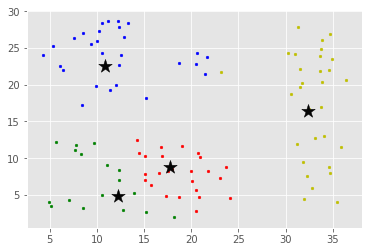

In [25]:
colors = ['r', 'g', 'b', 'y', 'c', 'm','black','grey','orange','purple']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([datatest[j] for j in range(len(datatest)) if cluster[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='#050505')

# <center> KESIMPULAN </center>

Kesimpulan dari pengujian data test menggunakan Nilai Cluster = 4 dengan nilai centroid x = [17.767733, 12.230082, 10.859322, 32.30764] dan nilai centroid y = [8.754651, 4.9341464, 22.559605, 16.432638] adalah:
<br>
<center> **SSE = 54.47080067697165** </center>
<br>
Sehingga, dapat dikatakan bahwa hasil observasi data train yang digunakan pada data test, membuat kualitas dari nilai cluster dengan centroid tersebut menjadi baik pada data test dengan nilai SSE yang cukup kecil.